In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

In [32]:
taxi_data = pd.read_csv("../../clean_data/FinalData_for_Models.csv")

In [33]:
taxi_data.shape

(30647, 17)

In [34]:
taxi_data.rename(columns={'Unnamed: 0':'pickup_time'}, inplace=True)

In [35]:
taxi_data = taxi_data.loc[taxi_data["missing_dt"]==False, :]

In [36]:
taxi_data.shape

(26230, 17)

In [39]:
taxi_data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0


In [37]:
# names = cal.holidays(return_name = True)
# data = pd.concat([taxi_data, names], axis=1, join_axes=[taxi_data.tpep_pickup_datetime])

## Exploratory Data Analysis

### How many trips on Holiday vs Non-Holiday days

In [38]:
taxi_data.holiday.value_counts(), taxi_data.holiday.value_counts(normalize=True)

(False    25558
 True       672
 Name: holiday, dtype: int64, False    0.97438
 True     0.02562
 Name: holiday, dtype: float64)

97% of the pickups belong to non-Holiday days while 3% during Holiday dates.

In [40]:
count_per_hour = taxi_data.groupby(['holiday','Hour']).num_pickups.sum()

In [41]:
count_df = count_per_hour.unstack(level=0)

In [42]:
count_df["Normal Days"] = count_df[False]/25558
count_df["Federal Holidays"] = count_df[True]/672

In [43]:
count_df.head()

holiday,False,True,Normal Days,Federal Holidays
Hour,,,,
0,270363.0,5533.0,10.578410,8.233631
1,59680.0,839.0,2.335081,1.248512
2,15430.0,249.0,0.603725,0.370536
3,4831.0,173.0,0.189021,0.257440
4,8178.0,253.0,0.319978,0.376488


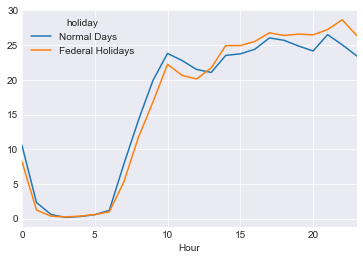

In [44]:
count_df[["Normal Days", "Federal Holidays"]].plot(kind="line")

In [45]:
names = calendar().holidays(return_name = True)

In [49]:
holiday_names = pd.DataFrame(names)

In [55]:
holiday_names=holiday_names.rename(columns={'':'date', '0':'name'}, inplace=True)

AttributeError: 'NoneType' object has no attribute 'rename'

In [56]:
holiday_names